In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Preporcessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Model

In [8]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential


In [9]:
model = Sequential()

In [10]:
##Convolution Layer

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1024, activation='relu'))

In [17]:
#output
model.add(Dense(units=38, activation='softmax')) #probability

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

Training

In [20]:
training_history= model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 243s 105ms/step - loss: 1.3974 - accuracy: 0.5963 - val_loss: 0.6566 - val_accuracy: 0.7888
Epoch 2/10
2197/2197 [==============================] - 222s 101ms/step - loss: 0.4500 - accuracy: 0.8546 - val_loss: 0.4093 - val_accuracy: 0.8718
Epoch 3/10
2197/2197 [==============================] - 227s 103ms/step - loss: 0.2731 - accuracy: 0.9099 - val_loss: 0.3617 - val_accuracy: 0.8862
Epoch 4/10
2197/2197 [==============================] - 232s 105ms/step - loss: 0.2039 - accuracy: 0.9326 - val_loss: 0.4413 - val_accuracy: 0.8709
Epoch 5/10
2197/2197 [==============================] - 233s 106ms/step - loss: 0.1712 - accuracy: 0.9445 - val_loss: 0.3126 - val_accuracy: 0.9078
Epoch 6/10
2197/2197 [==============================] - 226s 103ms/step - loss: 0.1463 - accuracy: 0.9520 - val_loss: 0.4416 - val_accuracy: 0.8906
Epoch 7/10
2197/2197 [==============================] - 225s 102ms/step - loss: 0.1378 - accuracy: 0.9554 - val_

In [21]:
#eval
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 [==============================] - 94s 43ms/step - loss: 0.0989 - accuracy: 0.9679


In [22]:
print(training_loss, training_accuracy)

0.09889145195484161 0.9679351449012756


In [23]:
#eval
val_loss, val_accuracy = model.evaluate(validation_set) 

550/550 [==============================] - 21s 37ms/step - loss: 0.3488 - accuracy: 0.9081


In [24]:
print(val_loss, val_accuracy)

0.3487806022167206 0.9081493020057678


In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [1.3974151611328125,
  0.4500082731246948,
  0.2731250822544098,
  0.2038956582546234,
  0.17119857668876648,
  0.14628730714321136,
  0.13775911927223206,
  0.12300985306501389,
  0.12055949121713638,
  0.11114323139190674],
 'accuracy': [0.596343994140625,
  0.8546411395072937,
  0.9098513126373291,
  0.9325841069221497,
  0.944476842880249,
  0.9520022869110107,
  0.9553737640380859,
  0.9603243470191956,
  0.9620456695556641,
  0.9651042222976685],
 'val_loss': [0.6565608978271484,
  0.40932443737983704,
  0.3617473542690277,
  0.44127219915390015,
  0.312567800283432,
  0.4415924549102783,
  0.38701513409614563,
  0.39492642879486084,
  0.36928790807724,
  0.34878048300743103],
 'val_accuracy': [0.7888117432594299,
  0.871841549873352,
  0.8861825466156006,
  0.8708741068840027,
  0.9077509641647339,
  0.8906214237213135,
  0.8976781368255615,
  0.9019463062286377,
  0.9080355167388916,
  0.9081493020057678]}

In [27]:
#recordiing
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

Visualization

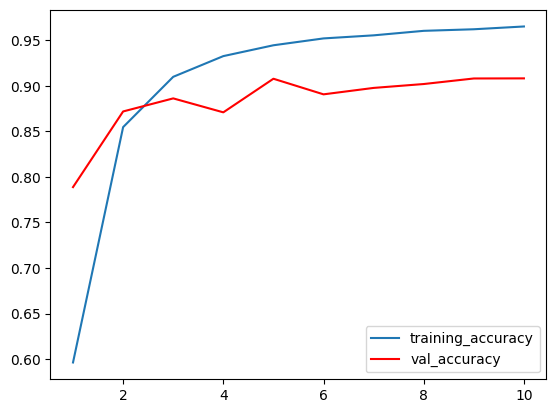

In [28]:
epochs = [i for i in range (1,11)]
epochs
plt.plot(epochs, training_history.history['accuracy'], label='training_accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 16s 28ms/step


(array([[9.9999762e-01, 2.8689968e-07, 4.8795137e-09, ..., 2.2165338e-17,
         1.3176242e-16, 1.7350536e-15],
        [9.9897695e-01, 4.4967262e-08, 4.8196554e-05, ..., 1.6824091e-10,
         9.4847978e-14, 1.5573333e-11],
        [1.0000000e+00, 2.9413521e-14, 6.6797713e-12, ..., 5.2414739e-19,
         6.6033899e-18, 7.4817123e-17],
        ...,
        [1.0842797e-07, 1.0207367e-16, 1.4934444e-11, ..., 2.9712370e-05,
         3.3917856e-17, 9.9923944e-01],
        [2.2561533e-11, 2.0098796e-17, 1.8296130e-15, ..., 7.1271963e-08,
         2.5997274e-17, 9.9982977e-01],
        [2.1911128e-19, 5.0209308e-24, 2.8594784e-15, ..., 4.6329139e-17,
         3.0204778e-14, 9.9994195e-01]], dtype=float32),
 (17572, 38))

In [32]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(Y_true,   predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.88      0.88       504
                                 Apple___Black_rot       0.98      0.90      0.94       497
                          Apple___Cedar_apple_rust       0.81      0.96      0.88       440
                                   Apple___healthy       0.89      0.92      0.91       502
                               Blueberry___healthy       0.97      0.81      0.89       454
          Cherry_(including_sour)___Powdery_mildew       0.93      0.97      0.95       421
                 Cherry_(including_sour)___healthy       0.94      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.89      0.88       410
                       Corn_(maize)___Common_rust_       0.94      0.99      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.87      0.

In [37]:
cm = confusion_matrix(Y_true, predicted_categories)

In [38]:
cm.shape

(38, 38)

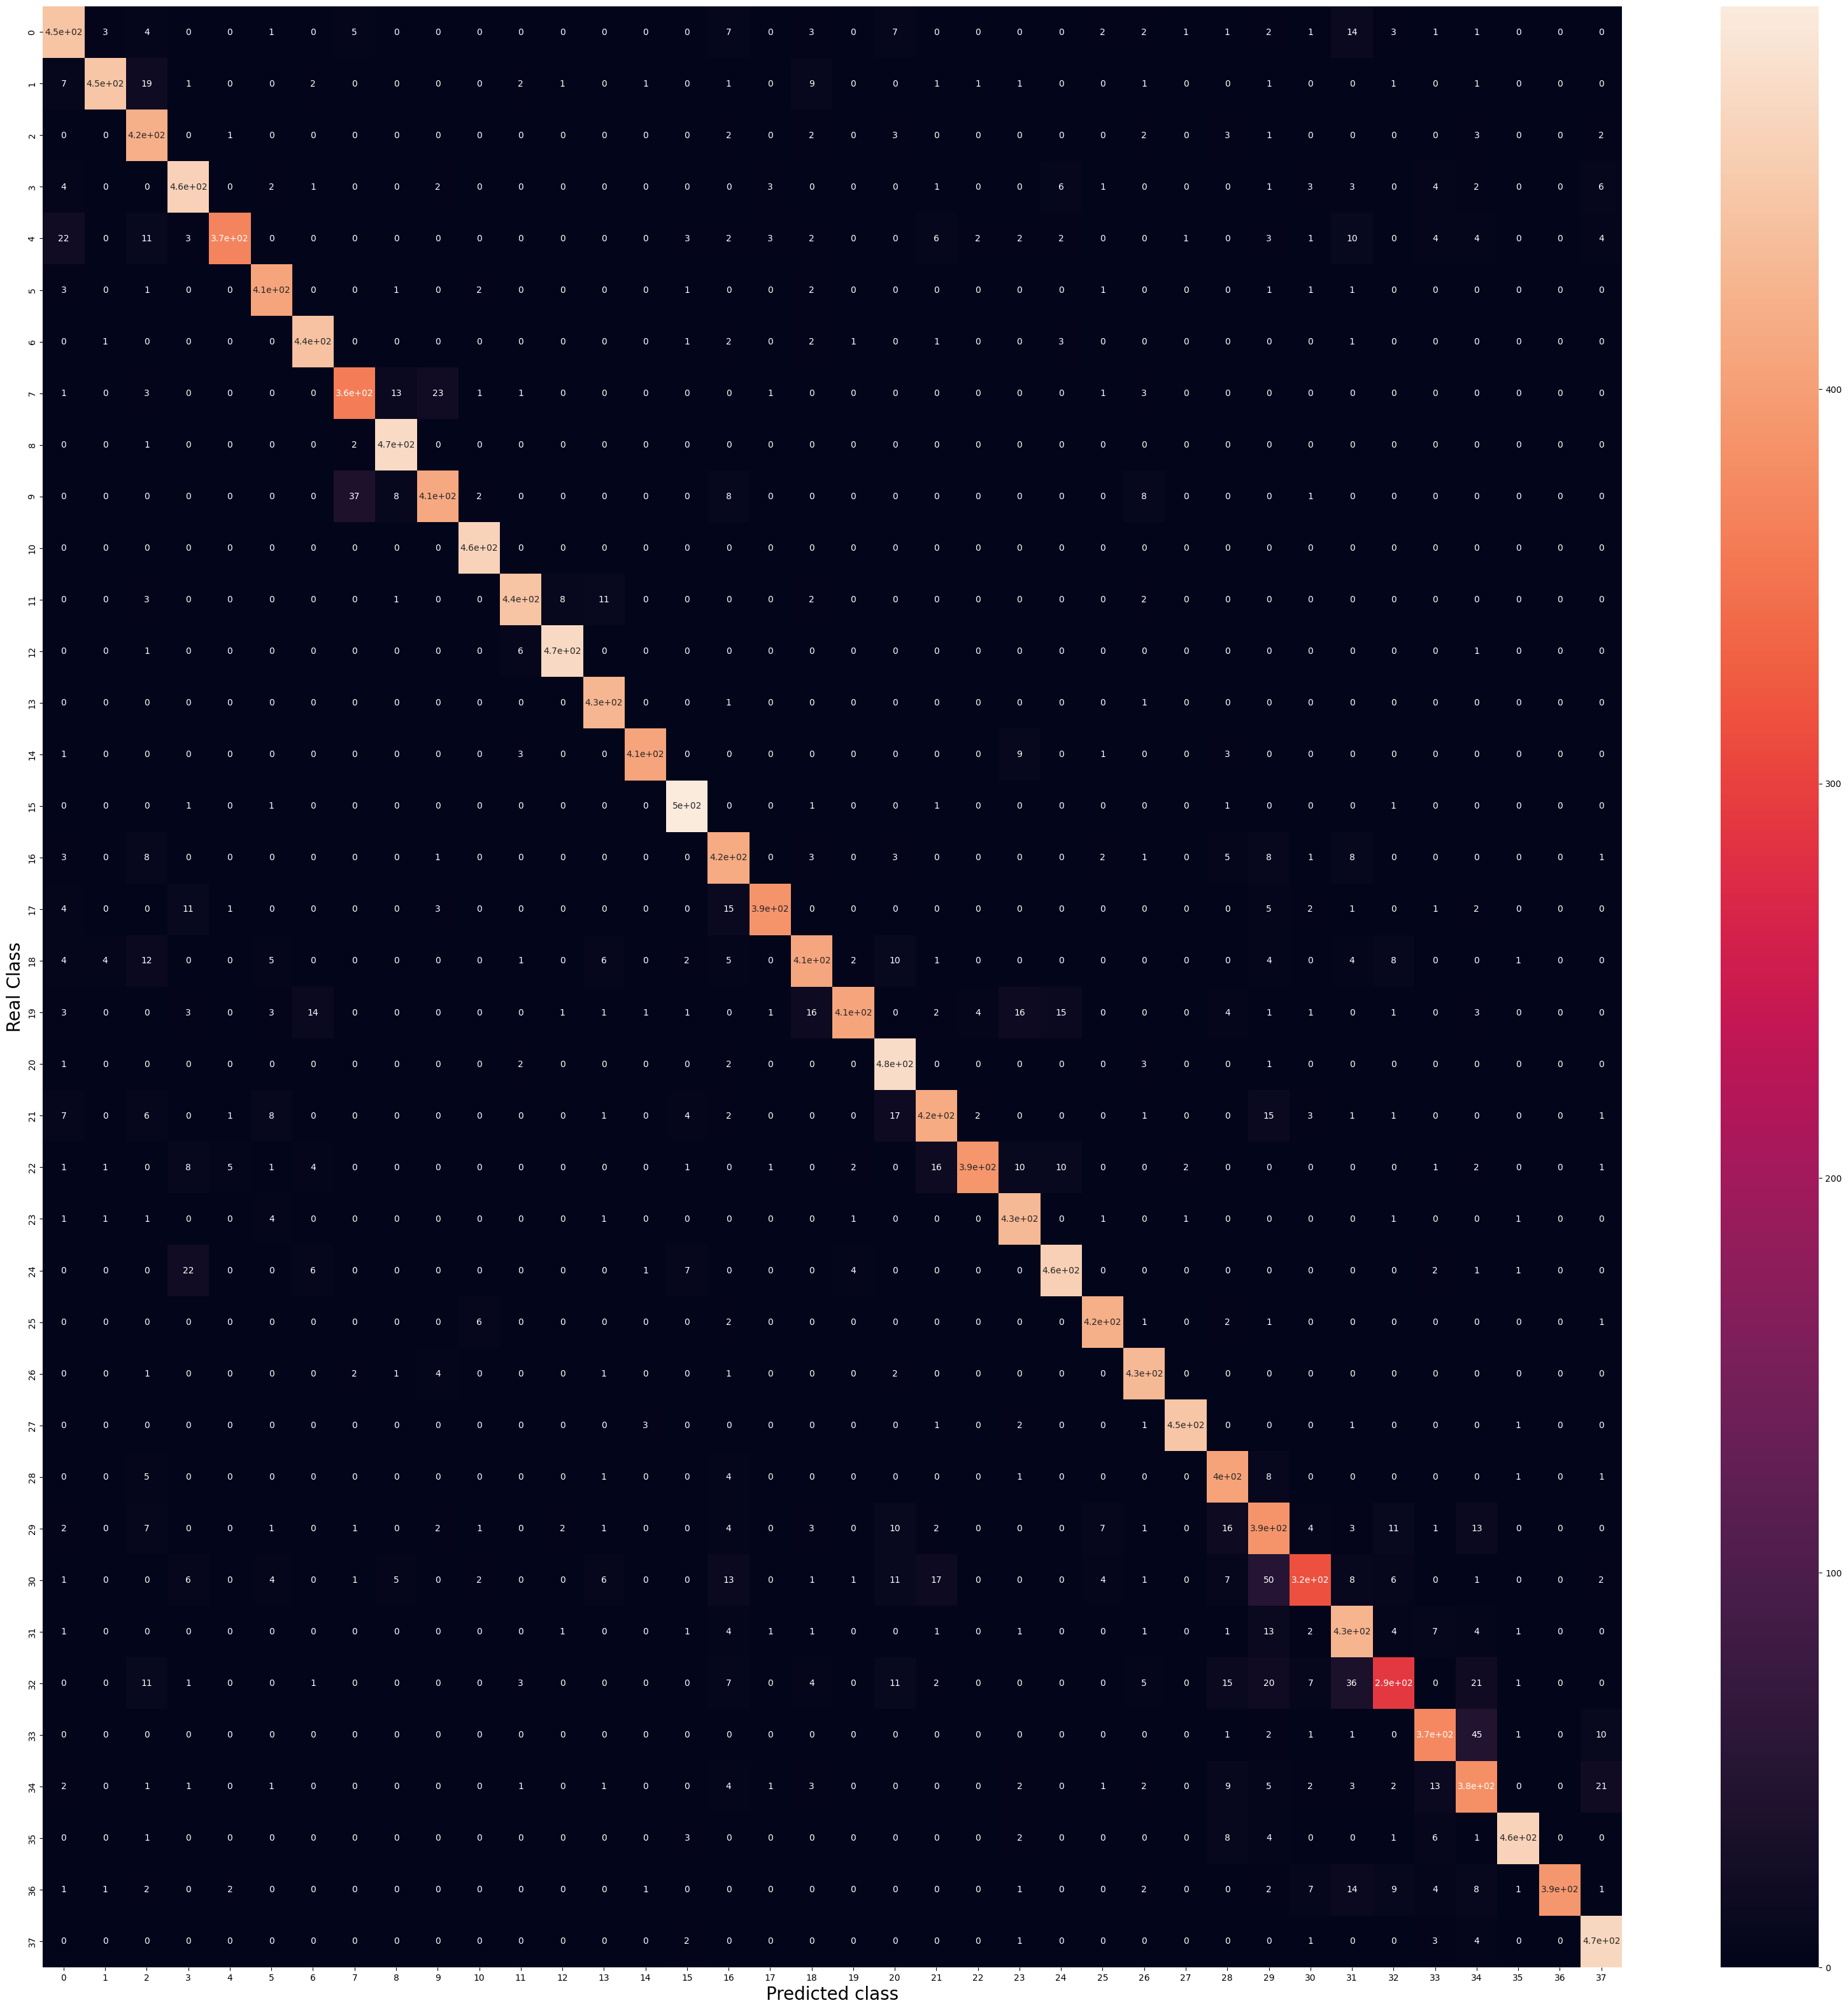

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Real Class", fontsize=20)
plt.show()